In [23]:
import pandas as pd
import parselmouth
import numpy as np

zoom3 = pd.read_csv(r"C:\Users\IEC010240\Desktop\Thai_Tone\ZOOM0003.txt", encoding="UTF-8", sep="\t", header=0)
#df['tmin'] = df['tmin'].str.replace(" ", "")
#df['tmax'] = df['tmax'].str.replace(" ", "")
zoom3['tier'] = zoom3['tier'].str.replace(" ", "")
zoom3['text'] = zoom3['text'].str.replace(" ", "")
#print("zoom3")
#print(zoom3)
#print("----")

zoom4 = pd.read_csv(r"C:\Users\IEC010240\Desktop\Thai_Tone\ZOOM0004.txt", encoding="UTF-8", sep=" ", header=0)
#df['tmin'] = df['tmin'].str.replace(" ", "")
#df['tmax'] = df['tmax'].str.replace(" ", "")
zoom4['tier'] = zoom4['tier'].str.replace(" ", "")
zoom4['text'] = zoom4['text'].str.replace(" ", "")
#print("zoom4")
#print(zoom4)
#print("----")

zoom5 = pd.read_csv(r"C:\Users\IEC010240\Desktop\Thai_Tone\ZOOM0005.txt", encoding="UTF-8", sep="\t", header=0)
#df['tmin'] = df['tmin'].str.replace(" ", "")
#df['tmax'] = df['tmax'].str.replace(" ", "")
zoom5['tier'] = zoom5['tier'].str.replace(" ", "")
zoom5['text'] = zoom5['text'].str.replace(" ", "")
#print("zoom5")
#print(zoom5)
#print("----")

zoom3snd = parselmouth.Sound(r"C:\Users\IEC010240\Desktop\Thai_Tone\ZOOM0003.WAV")
zoom4snd = parselmouth.Sound(r"C:\Users\IEC010240\Desktop\Thai_Tone\ZOOM0004.WAV")
zoom5snd = parselmouth.Sound(r"C:\Users\IEC010240\Desktop\Thai_Tone\ZOOM0005.WAV")

In [24]:
def aggdf(df):
    column=['tmin','tmax','word','IU/tone','EU/tone', 'pMax', 'pMin', 'pAvg']
    newdf = pd.DataFrame(columns = column)
    #print(newdf)
    #print(int(df.shape[0]-1 / 3))

    for i in range(df.shape[0]):
        tmin = df.iloc[i].tmin
        tmax = df.iloc[i].tmax
        r = newdf.loc[(newdf['tmax'] == tmax) & (newdf['tmin'] == tmin)]
        #print(r)
        if r.empty:
            s = pd.Series({'tmin':tmin, 'tmax':tmax})
            # 这里 Series 必须是 dict-like 类型
            newdf = newdf.append(s, ignore_index=True)    

    for idxbase in range(df.shape[0]):
        tmin = df.iloc[idxbase].tmin
        tmax = df.iloc[idxbase].tmax

        if df.iloc[idxbase].tier =='word':
            #print(idxbase)
            word = df.iloc[idxbase].text
            word = word.replace("?","")
            word = word.replace("*","")
            newdf.loc[(newdf.tmax == tmax) & (newdf.tmin == tmin), 'word'] = word
        elif df.iloc[idxbase].tier =='IU/tone':
            #print(idxbase)
            tiu = df.iloc[idxbase].text.replace("?","")
            if len(df.iloc[idxbase].text)<= 2 :
                iu = tiu
            else:
                s = tiu
                iu = " ".join(s[k:k+2] for k in range(0, len(s), 2))
            newdf.loc[(newdf.tmax == tmax) & (newdf.tmin == tmin), 'IU/tone'] = iu
        elif df.iloc[idxbase].tier =='EU/tone':
            #print("EU/tone", df.iloc[idxbase].tier)
            teu = df.iloc[idxbase].text.replace("?","")
            if len(df.iloc[idxbase].text) <= 2 :
                eu = teu
            else:
                s = teu
                eu = " ".join(s[k:k+2] for k in range(0, len(s), 2))
            newdf.loc[(newdf.tmax == tmax) & (newdf.tmin == tmin), 'EU/tone'] = eu

    #pd.set_option('display.width', 1000)
    #newdf.style.set_properties(**{'text-align': 'right'})
    #print(newdf)
    return newdf

In [25]:
def extract_pitch(snd, tmin, tmax):
    snd_part = snd.extract_part(from_time=tmin, to_time=tmax, preserve_times=True)
    pch = snd_part.to_pitch()
    #print(pch)
    pay = pch.to_matrix()
    a = pay.as_array()
    aa = a[a != 0]
    if len(aa) != 0:
        pmax = np.max(aa)
        pmin = np.min(aa)
        pavg = np.average(aa)
        #print(pmax, pmin, aa, pavg)
        return pmax, pmin, pavg
    else:
        return np.nan, np.nan, np.nan


In [26]:
def dfpitch(df, snd):
    #print(df)
    for index, row in df.iterrows():
        if row["IU/tone"] == row["EU/tone"] and row["word"] != "":
            #print(i, "Equal")
            pmax, pmin, pavg = extract_pitch(snd, row["tmin"], row["tmax"])
            #print(i, df.iloc[i]["tmin"], df.iloc[i]["tmax"], pmin, pmax, pavg)
            df.set_value(index,'pMax', pmax)
            df.set_value(index,'pMin', pmin)
            df.set_value(index,'pAvg', pavg)
    return df

In [27]:
newzoom3=aggdf(zoom3)

In [28]:
z3 = dfpitch(newzoom3, zoom3snd)
z3

C:\Users\IEC010240\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\IEC010240\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\IEC010240\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,tmin,tmax,word,IU/tone,EU/tone,pMax,pMin,pAvg
0,4.509497,5.742173,老師,21 55,51 55,NaN,NaN,NaN
1,17.523613,19.394128,老師,21 55,51 55,NaN,NaN,NaN
2,25.184943,26.489286,海洋,21 35,21 35,266.479102,76.999431,128.063852
3,56.586235,58.535584,,NaN,NaN,NaN,NaN,NaN
4,62.123764,63.944112,,NaN,NaN,NaN,NaN,NaN
5,67.746904,68.456410,,NaN,NaN,NaN,NaN,NaN
6,74.316441,75.377116,老師,21 55,55 51,NaN,NaN,NaN
7,78.693606,79.180943,,NaN,NaN,NaN,NaN,NaN
8,89.787953,90.031417,我,21,55,NaN,NaN,NaN
9,90.031417,90.429474,簽名,55 35,55 51,NaN,NaN,NaN


In [29]:
newzoom4 = aggdf(zoom4)

In [30]:
z4 = dfpitch(newzoom4, zoom4snd)
z4

C:\Users\IEC010240\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\IEC010240\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\IEC010240\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,tmin,tmax,word,IU/tone,EU/tone,pMax,pMin,pAvg
0,52.601,53.022,看,51,51,532.028699,220.006567,399.892397
1,53.022,53.751,老師,21 55,21 55,448.209673,95.473061,252.316610
2,54.845,56.052,閉起來,51 21 35,51 21 35,531.267484,136.166971,365.883868
3,61.272,62.282,一人一分,51 35 51 55,51 35 21 55,NaN,NaN,NaN
4,100.896,102.143,影子,21 00,21 00,318.896064,95.514681,178.071639
5,103.352,104.292,影子,21 00,21 00,280.955108,84.275289,208.790906
6,115.338,116.604,瓶子,35 00,35 00,485.662693,257.888180,326.378279
7,117.861,118.868,瓶子,35 00,35 00,304.788368,92.909001,208.515031
8,122.811,123.617,喝,55,55,326.183854,94.982682,201.764756
9,123.617,124.519,水,21,21,364.438651,104.203211,288.764855


In [31]:
newzoom5 = aggdf(zoom5)

In [32]:
z5 = dfpitch(newzoom5, zoom5snd)
z5

C:\Users\IEC010240\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\IEC010240\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\IEC010240\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,tmin,tmax,word,IU/tone,EU/tone,pMax,pMin,pAvg
0,32.105275,32.974001,老,21,35,NaN,NaN,NaN
1,35.714925,36.483709,老師,21 55,21 55,527.823438,109.380469,237.587659
2,38.023245,38.576770,老師,21 55,21 55,181.230490,129.446429,157.302417
3,38.576770,38.876595,我,21,21,261.266530,174.167330,214.778122
4,38.876595,39.253300,要,51,51,563.222361,175.632184,331.175108
5,39.253300,40.421852,喝水,55 21,55 21,571.335502,127.721312,319.290137
6,137.425903,138.263878,老師,21 55,21 55,351.630309,88.467592,175.705379
7,138.263878,138.579079,我,21,21,124.528575,92.176244,115.409809
8,138.579079,139.024974,要,51,51,348.662424,281.905078,305.724657
9,139.024974,139.816822,喝水,55 21,55 21,373.268969,81.231884,291.753338


In [43]:
z= pd.DataFrame()
z=z.append(z3, ignore_index = True)
z=z.append(z4, ignore_index = True)
z=z.append(z5, ignore_index = True)
#for i in range(z.shape[0]):
#    print(z.iloc[i])
z

,tmin,tmax,word,IU/tone,EU/tone,pMax,pMin,pAvg
0,4.509497,5.742173,老師,21 55,51 55,NaN,NaN,NaN
1,17.523613,19.394128,老師,21 55,51 55,NaN,NaN,NaN
2,25.184943,26.489286,海洋,21 35,21 35,266.479102,76.999431,128.063852
3,56.586235,58.535584,,NaN,NaN,NaN,NaN,NaN
4,62.123764,63.944112,,NaN,NaN,NaN,NaN,NaN
5,67.746904,68.456410,,NaN,NaN,NaN,NaN,NaN
6,74.316441,75.377116,老師,21 55,55 51,NaN,NaN,NaN
7,78.693606,79.180943,,NaN,NaN,NaN,NaN,NaN
8,89.787953,90.031417,我,21,55,NaN,NaN,NaN
9,90.031417,90.429474,簽名,55 35,55 51,NaN,NaN,NaN


In [48]:
z=z.sort_values(by=['word'])
print(z.to_string())

            tmin         tmax  word      IU/tone      EU/tone        pMax        pMin        pAvg
24    164.307797   165.354539                NaN          NaN         NaN         NaN         NaN
79    393.936859   394.657090                NaN          NaN         NaN         NaN         NaN
189   644.108482   645.149602                NaN        51 51         NaN         NaN         NaN
440   673.579121   674.257234                NaN        35 51         NaN         NaN         NaN
3      56.586235    58.535584                NaN          NaN         NaN         NaN         NaN
4      62.123764    63.944112                NaN          NaN         NaN         NaN         NaN
5      67.746904    68.456410                NaN          NaN         NaN         NaN         NaN
131   477.175363   477.409964                NaN          NaN         NaN         NaN         NaN
7      78.693606    79.180943                NaN          NaN         NaN         NaN         NaN
439   672.426327   6

In [49]:
zz=z.groupby(['word', 'EU/tone'], as_index=False).size()
print(zz.to_string())

word  EU/tone    
      21              1
      21 51           3
      35 21           1
      35 51           1
      51 51           1
一     51              1
      55              5
一人一分  51 35 21 55     1
一個    35              1
一天    51 55           2
七     55              3
三     55              3
三十    55 35           2
三十一   55 21 55        1
      55 35 55        1
上     51              1
      55              1
上學    51 35           4
      55 35           1
上廁所   51 51 21        4
下午    35 21           2
      35 21 1         1
      51 21          11
      55 21          13
不一樣   51 21 51        1
中     55              1
中午    35 21           1
      55 21          33
      55 51           1
中文    55 21           1
      55 35           9
九     21              4
二     35              1
      51              4
二十    51 35           1
      51 55           1
二十一   51 35 55        1
二十二   51 35 51        3
五     21              5
人     21              1
      35              

In [22]:
z21=z.loc[(z['IU/tone'] == '21') & (z['EU/tone'] == '21')]
z35=z.loc[(z['IU/tone'] == '35') & (z['EU/tone'] == '35')]
z51=z.loc[(z['IU/tone'] == '51') & (z['EU/tone'] == '51')]
z55=z.loc[(z['IU/tone'] == '55') & (z['EU/tone'] == '55')]
t21=z.loc[(z['IU/tone'] == '21') & (z['EU/tone'] == '21')]
t35=z.loc[(z['IU/tone'] == '35') & (z['EU/tone'] == '35')]
t51=z.loc[(z['IU/tone'] == '51') & (z['EU/tone'] == '51')]
t55=z.loc[(z['IU/tone'] == '55') & (z['EU/tone'] == '55')]
t21 = t21.loc[:,'word'].values
t35 = t35.loc[:,'word'].values
t51 = t51.loc[:,'word'].values
t55 = t55.loc[:,'word'].values
#t21=np.delete(t21,100)
#print(z21.shape,t21.shape)
#t21

In [23]:
y21=z21.loc[:,'pAvg'].values
npl = np.logical_not(np.isnan(y21))
#print(npl)
yy21 = y21[npl]
#print(y21.shape, yy21.shape)
tt21 = t21[npl]
#print(yy21.shape, tt21.shape)
x21=np.arange(1,yy21.shape[0]+1,1)
#print(x)
y21min = z21.loc[:,'pAvg'].values - z21.loc[:,'pMin'].values
y21min = y21min[np.logical_not(np.isnan(y21min))]
y21max = z21.loc[:,'pMax'].values - z21.loc[:,'pAvg'].values
y21max = y21max[np.logical_not(np.isnan(y21max))]

#print(y21min, y21max)
y21err=np.concatenate((y21min, y21max),axis=0)
y21err= y21err.reshape(2,yy21.shape[0])
#print(type(yerr), yerr.shape)
#print(yerr)

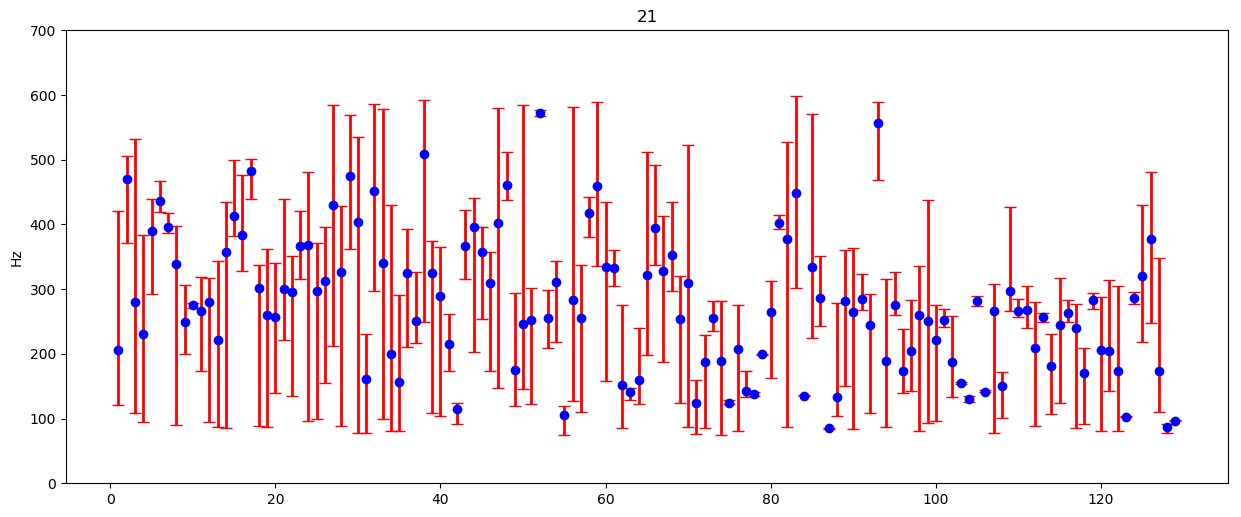

In [24]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(figsize=(15,6), dpi=100)
plt.errorbar(x21, yy21, y21err, fmt='o', ecolor='r',color='b', elinewidth=2,capsize=4)
plt.title("21")
plt.ylabel("Hz")
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,700])

#for i, txt in enumerate(tt21):
#    plt.annotate(txt, (x21[i], yy21[i]))
    
plt.show()

In [25]:
y35=z35.loc[:,'pAvg'].values
y35 = y35[np.logical_not(np.isnan(y35))]
#print(y21)

#print(y21.shape)
x35=np.arange(1,y35.shape[0]+1,1)
#print(x)
y35min = z35.loc[:,'pAvg'].values - z35.loc[:,'pMin'].values
y35min = y35min[np.logical_not(np.isnan(y35min))]
y35max = z35.loc[:,'pMax'].values - z35.loc[:,'pAvg'].values
y35max = y35max[np.logical_not(np.isnan(y35max))]

#print(y21min, y21max)
y35err=np.concatenate((y35min, y35max),axis=0)
y35err= y35err.reshape(2,y35.shape[0])
#print(type(yerr), yerr.shape)
#print(yerr)


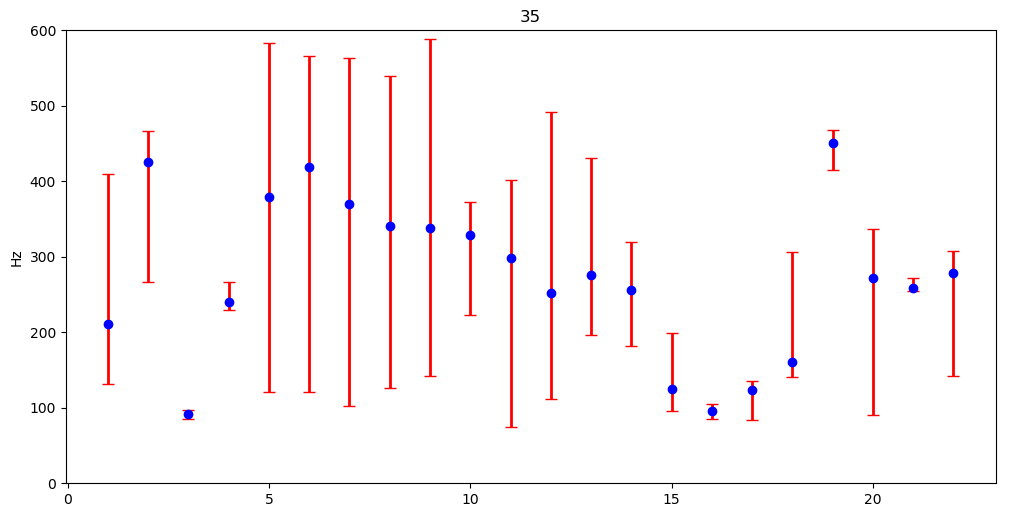

In [26]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(figsize=(12,6), dpi=100)
plt.errorbar(x35, y35, y35err, fmt='o', ecolor='r',color='b', elinewidth=2,capsize=4)
plt.title("35")
plt.ylabel("Hz")
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,600])

#for i, txt in enumerate(t35):
#    plt.annotate(txt, (x35[i], y35[i]))

plt.show()

In [27]:
y51=z51.loc[:,'pAvg'].values
y51 = y51[np.logical_not(np.isnan(y51))]
#print(y21)

#print(y21.shape)
x51=np.arange(1,y51.shape[0]+1,1)
#print(x)
y51min = z51.loc[:,'pAvg'].values - z51.loc[:,'pMin'].values
y51min = y51min[np.logical_not(np.isnan(y51min))]
y51max = z51.loc[:,'pMax'].values - z51.loc[:,'pAvg'].values
y51max = y51max[np.logical_not(np.isnan(y51max))]

#print(y21min, y21max)
y51err=np.concatenate((y51min, y51max),axis=0)
y51err= y51err.reshape(2,y51.shape[0])
#print(type(yerr), yerr.shape)
#print(yerr)


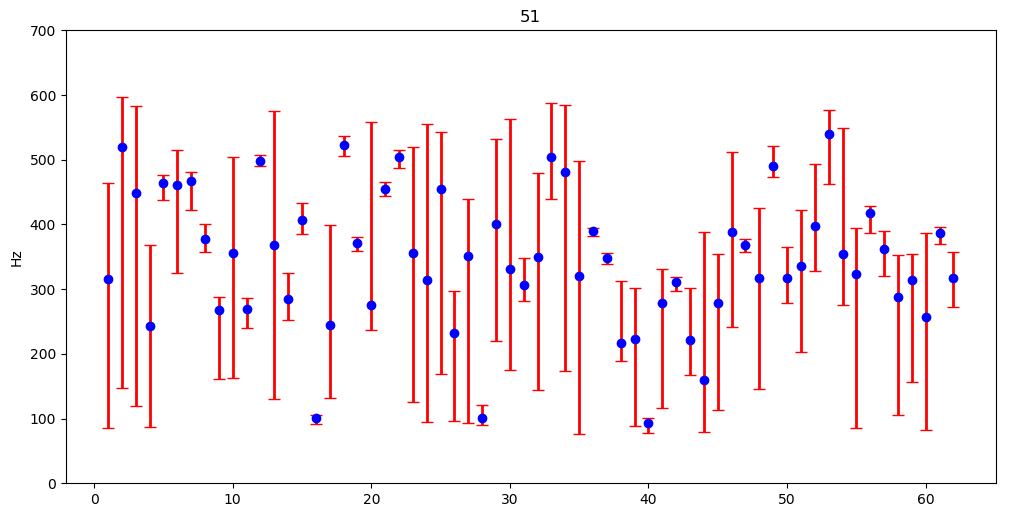

In [28]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(figsize=(12,6), dpi=100)
plt.errorbar(x51, y51, y51err, fmt='o', ecolor='r',color='b', elinewidth=2,capsize=4)
plt.title("51")
plt.ylabel("Hz")
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,700])
plt.show()

In [29]:
y55=z55.loc[:,'pAvg'].values
y55 = y55[np.logical_not(np.isnan(y55))]
#print(y21)

#print(y21.shape)
x55=np.arange(1,y55.shape[0]+1,1)
y55min = z55.loc[:,'pAvg'].values - z55.loc[:,'pMin'].values
y55min = y55min[np.logical_not(np.isnan(y55min))]
y55max = z55.loc[:,'pMax'].values - z55.loc[:,'pAvg'].values
y55max = y55max[np.logical_not(np.isnan(y55max))]

#print(y21min, y21max)
y55err=np.concatenate((y55min, y55max),axis=0)
y55err= y55err.reshape(2,y55.shape[0])
#print(type(yerr), yerr.shape)
#print(yerr)


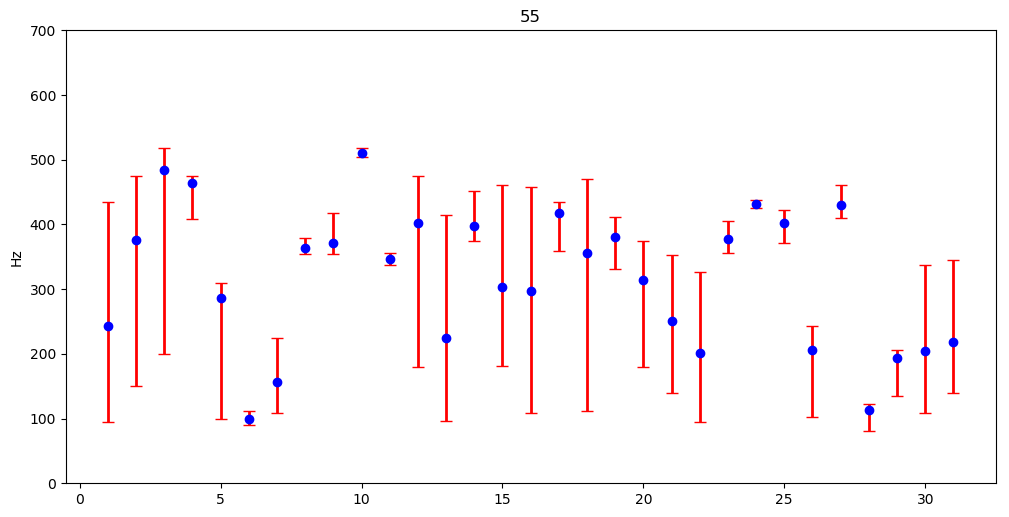

In [30]:
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(figsize=(12,6), dpi=100)
plt.errorbar(x55, y55, y55err, fmt='o', ecolor='r',color='b', elinewidth=2,capsize=4)
plt.title("55")
plt.ylabel("Hz")
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,700])
plt.show()